# Evaluation Project 5

# Census Income Project

In [123]:
# Importing important libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

In [93]:
# Getting the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [94]:
df.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [95]:
# Checking column names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [96]:
# Checking the shape
df.shape

(32560, 15)

In [97]:
# Understanding each column datatype and null values if any 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [98]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

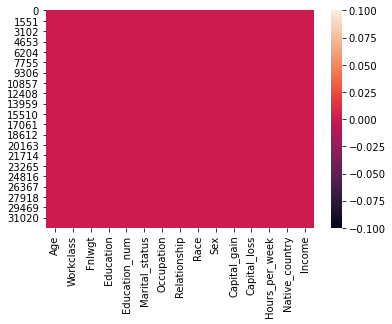

In [99]:
# Null values visulaization using heatmap
sns.heatmap(df.isnull())

In [100]:
#checking the datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [101]:
# Checking the statistics of the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [102]:
# Separating numerical & categorical columns from the dataset

In [103]:
df_numerical = df.select_dtypes(include='int64')

In [104]:
df_numerical 

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [105]:
df_categorical = df.select_dtypes(include='object')

In [106]:
df_categorical

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [107]:
# Handling categorical data
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [108]:
# replacing "?" to "Unemployed"
df['Workclass'].replace(" ?","Unemployed",inplace=True)

In [109]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', 'Unemployed', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [110]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [111]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [112]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [113]:
#Again we see the "?" in the Occupation column. 
df['Occupation'].replace(" ?","Unemployed",inplace=True)

In [114]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [115]:
#			Income
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [116]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [117]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [118]:
df['Native_country'].replace(" ?","Other",inplace=True)

In [119]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [120]:
for i in df['Income']:
    if i == ' <=50K':
        df['Income'].replace(" <=50K",0,inplace=True)
    else:
        df['Income'].replace(" >50K",1,inplace=True)
        
    

In [121]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [122]:
# Checking Statistics
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [124]:
# Checking the correlation
corr=df.corr()

In [125]:
corr

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


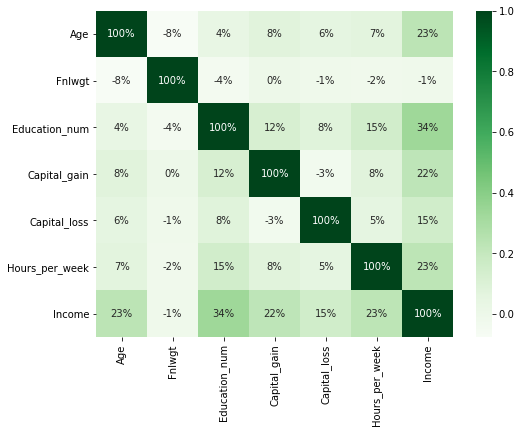

In [128]:
# Visualizing correlation using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt='.0%',cmap='Greens')
plt.show()

### Univariate Analysis
Count of people with >$50 & less than $50 income

<AxesSubplot:xlabel='Income', ylabel='count'>

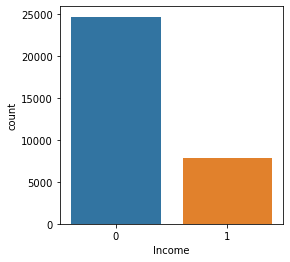

In [129]:
plt.subplots(figsize=(4,4))
sns.countplot(x='Income',data=df)

In [131]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

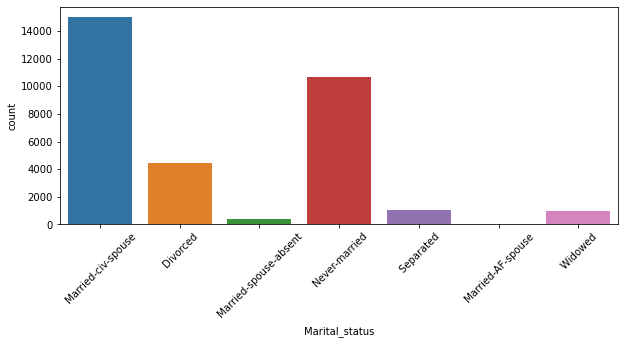

In [139]:
plt.subplots(figsize=(10,4))
sns.countplot(x='Marital_status',data=df)
plt.xticks(rotation=45)

The count of married people is high as compared to other 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

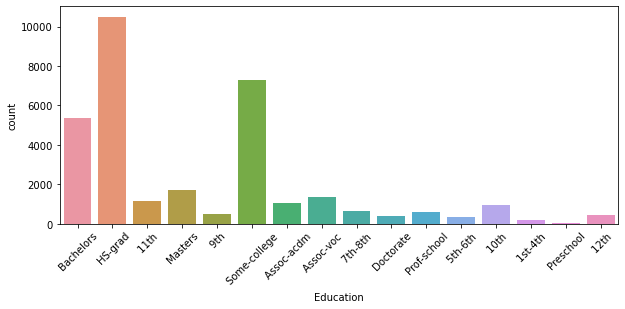

In [140]:
plt.subplots(figsize=(10,4))
sns.countplot(x='Education',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, 'Unemployed'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

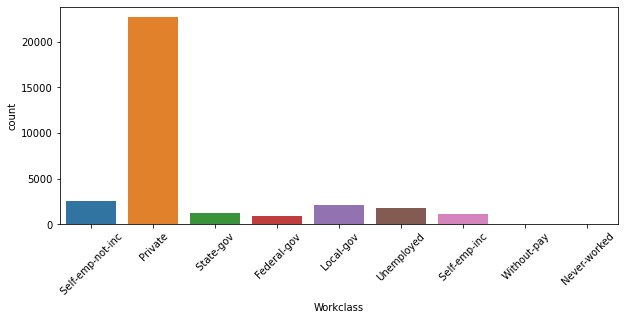

In [141]:
plt.subplots(figsize=(10,4))
sns.countplot(x='Workclass',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

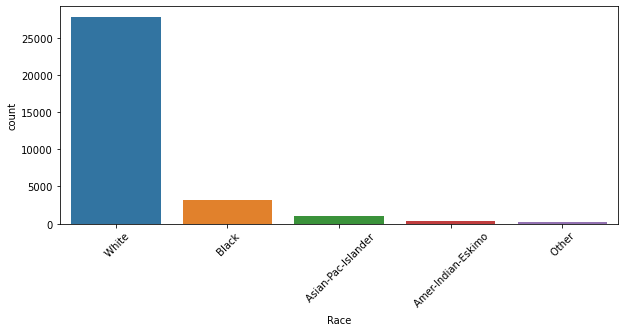

In [142]:
plt.subplots(figsize=(10,4))
sns.countplot(x='Race',data=df)
plt.xticks(rotation=45)

The count of white people is more

In [143]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

## Bivariate Analysis

<Figure size 720x720 with 0 Axes>

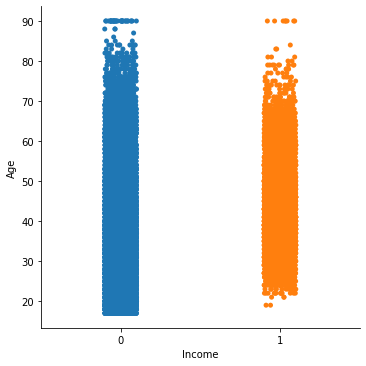

In [144]:
# Visualizing the age of the person who have more income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Age',data=df,kind='strip')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, 'Unemployed'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

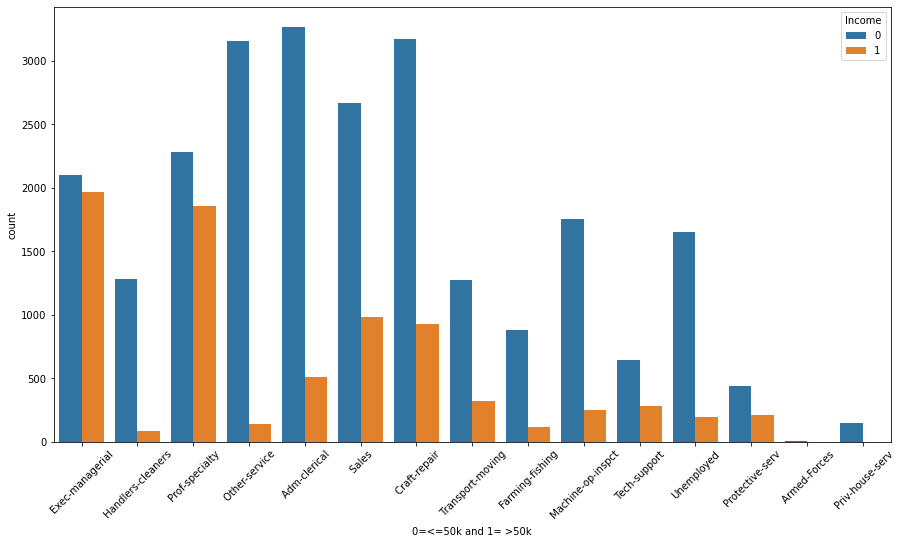

In [149]:
# Occupation vs income
plt.figure(figsize=(15,8))
sns.countplot(x="Occupation",hue="Income",data=df)
plt.xlabel('0=<=50k and 1= >50k')
plt.xticks(rotation=45)

In [150]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

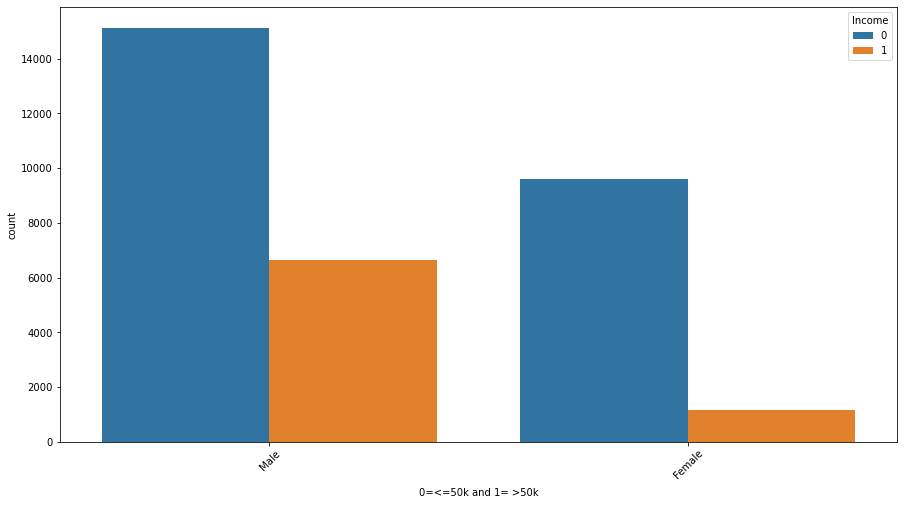

In [153]:
# Sex vs income
plt.figure(figsize=(15,8))
sns.countplot(x="Sex",hue="Income",data=df)
plt.xlabel('0=<=50k and 1= >50k')
plt.xticks(rotation=45)

The count of male individuals making the income is high 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

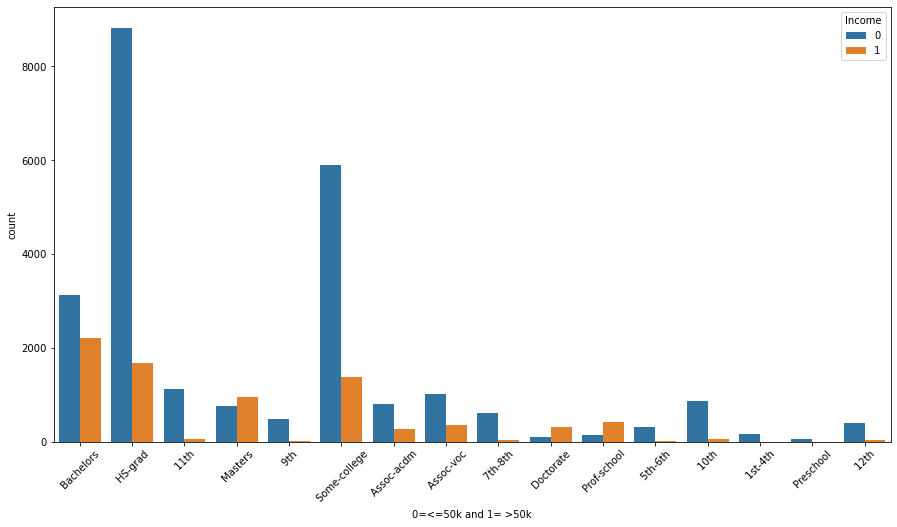

In [154]:
# Education vs income
plt.figure(figsize=(15,8))
sns.countplot(x="Education",hue="Income",data=df)
plt.xlabel('0=<=50k and 1= >50k')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

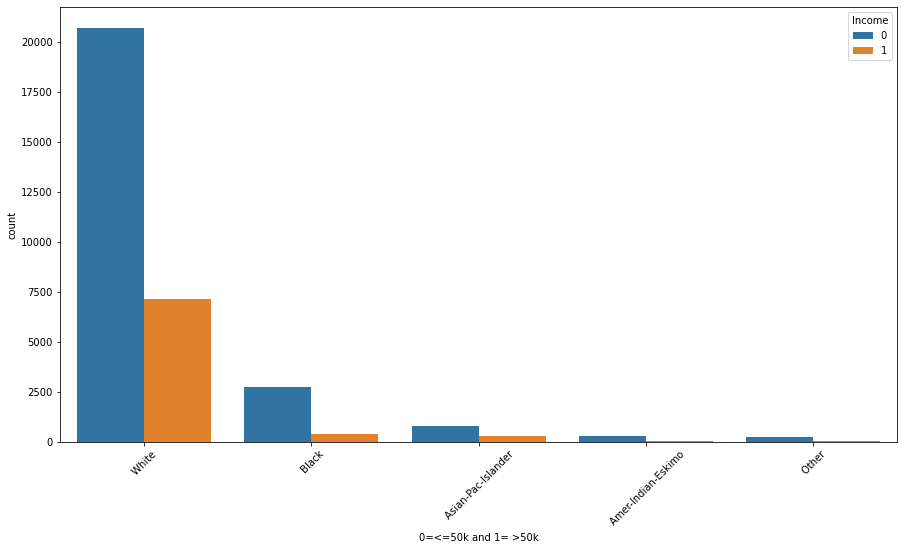

In [155]:
# Education vs income
plt.figure(figsize=(15,8))
sns.countplot(x="Race",hue="Income",data=df)
plt.xlabel('0=<=50k and 1= >50k')
plt.xticks(rotation=45)

In [156]:
# Checking Skewness 
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [159]:
# Encoding Categorical features
df_categorical.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [157]:
#Importing Label encoder from sklearn library
from sklearn.preprocessing import LabelEncoder

In [160]:
le=LabelEncoder()
df["Workclass"]=le.fit_transform(df["Workclass"])
df["Education"]=le.fit_transform(df["Education"])
df["Marital_status"]=le.fit_transform(df["Marital_status"])
df["Occupation"]=le.fit_transform(df["Occupation"])
df["Relationship"]=le.fit_transform(df["Relationship"])
df["Race"]=le.fit_transform(df["Race"])
df["Sex"]=le.fit_transform(df["Sex"])
df["Native_country"]=le.fit_transform(df["Native_country"])



In [161]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


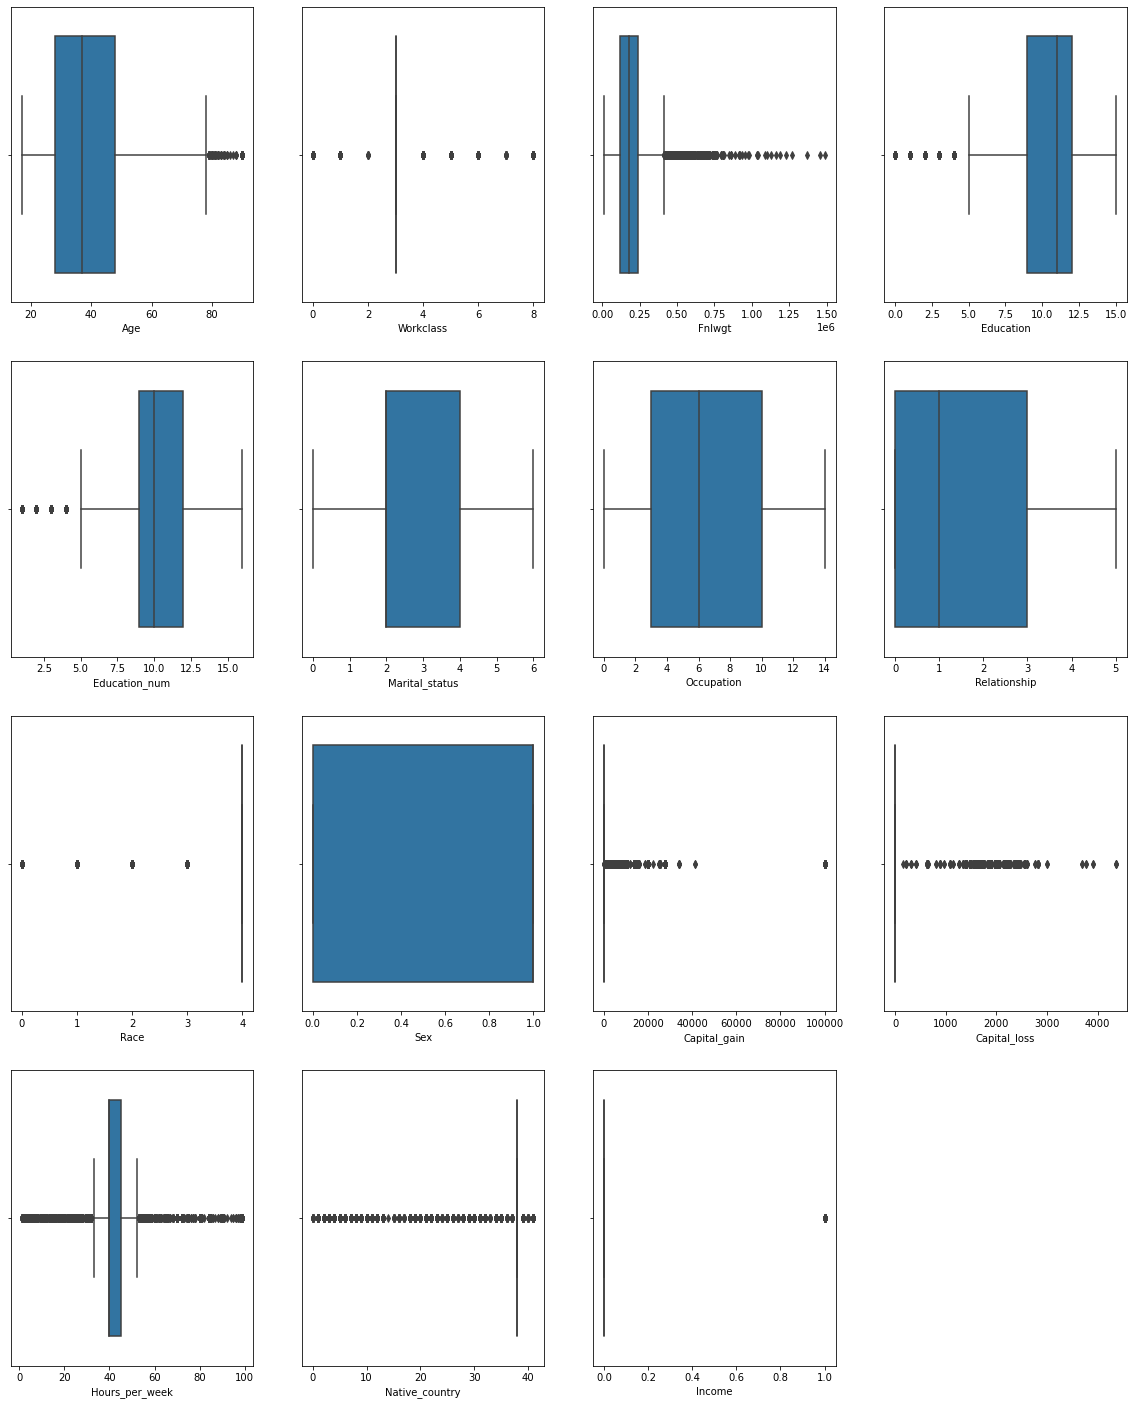

In [163]:
# Checking the outliers  for each column
plt.figure(figsize=(20,25), facecolor ='white')
pltnumber=1

for column in df:
    if pltnumber<=15:
        ax = plt.subplot(4,4,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
    pltnumber +=1
plt.show()  #plt.show()

In [164]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.83709708, 1.02638429, 1.0087417 , ..., 2.22212013, 0.25138175,
        0.5632099 ],
       [0.04264043, 0.23786147, 0.24504633, ..., 0.03542999, 0.25138175,
        0.5632099 ],
       [1.05703146, 0.23786147, 0.42576955, ..., 0.03542999, 0.25138175,
        0.5632099 ],
       ...,
       [1.42358875, 0.23786147, 0.3588108 , ..., 0.03542999, 0.25138175,
        0.5632099 ],
       [1.21562378, 0.23786147, 0.11092744, ..., 1.65520046, 0.25138175,
        0.5632099 ],
       [0.98372   , 0.39426141, 0.92986178, ..., 0.03542999, 0.25138175,
        1.77553698]])

In [165]:
df_z=df[(z<3).all(axis=1)] # removing outliers for z score value of more than 3 

In [167]:
df.shape

(32560, 15)

In [168]:
df_z.shape

(27783, 15)

In [169]:
#percentage loss
p_loss = (32560-27783)/32560*100

In [170]:
p_loss

14.67137592137592

In [172]:
#Checking for the skewness in the dataset
df_z.skew()

Age                0.484815
Workclass          1.183376
Fnlwgt             0.627839
Education         -0.955830
Education_num     -0.146241
Marital_status    -0.045497
Occupation         0.135730
Relationship       0.752998
Race              -2.587270
Sex               -0.688841
Capital_gain       4.930962
Capital_loss      29.521477
Hours_per_week    -0.359723
Native_country    -5.179023
Income             1.323412
dtype: float64

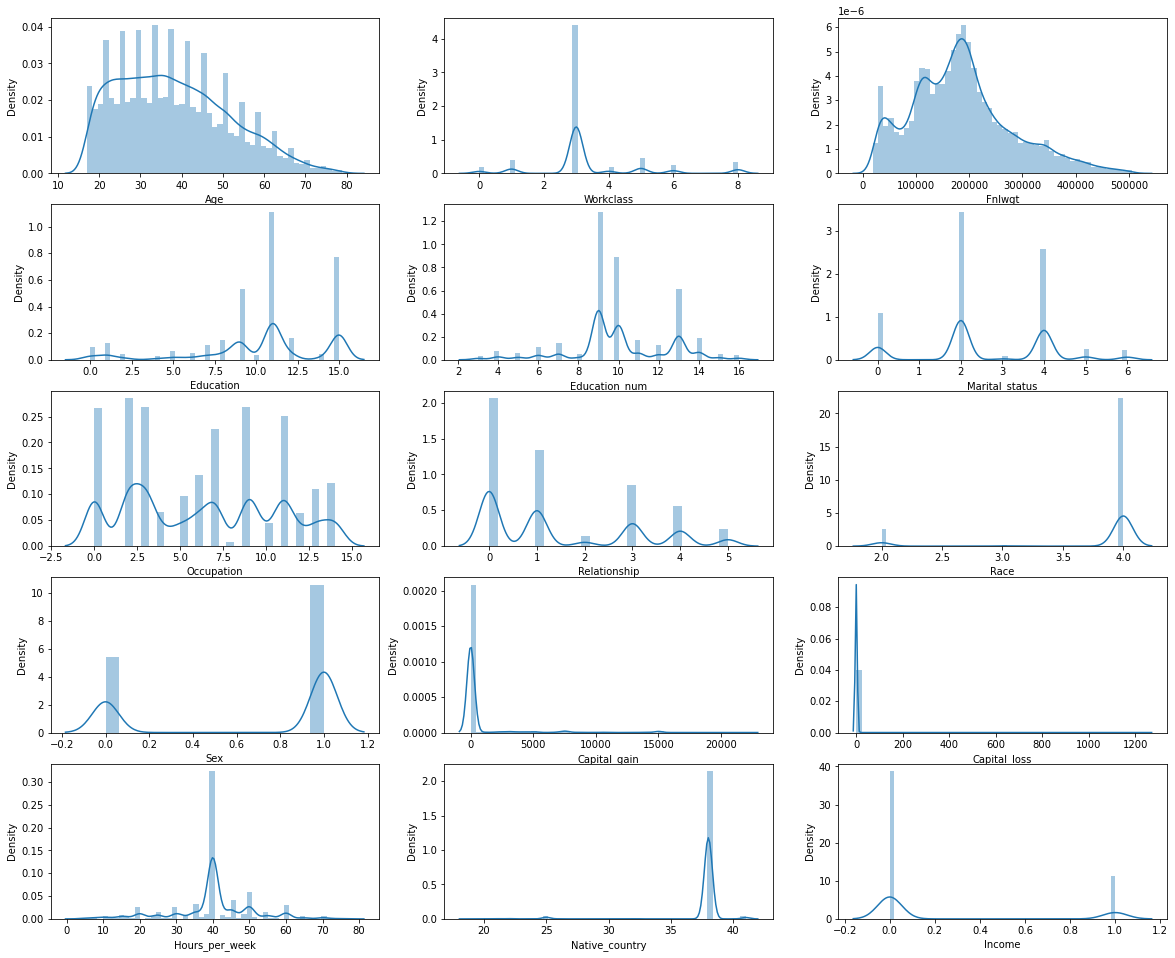

In [173]:
# Checking for the data distribution
# Checking the data distribution
plt.figure(figsize=(20,20), facecolor ='white')
pltnumber=1

for column in df_z:
    if pltnumber<=17:
        ax = plt.subplot(6,3,pltnumber)
        sns.distplot(df_z[column])
        plt.xlabel(column,fontsize=10)
    pltnumber +=1
plt.show()  #plt.show()

# Feature Selection

In [174]:
x=df_z.drop(columns=["Income"],axis=1)
y=df_z["Income"]

In [175]:
#Removing skewness in the dataset using power transform method
#importing power transform from library
from sklearn.preprocessing import power_transform

In [176]:
x=power_transform(x,method="yeo-johnson")
x

array([[ 0.92478243,  1.06127641, -1.12660978, ..., -0.04027807,
        -2.21494639,  0.04195581],
       [ 0.12842372, -0.14767017,  0.4130335 , ..., -0.04027807,
        -0.03973374,  0.04195581],
       [ 1.0995744 , -0.14767017,  0.59338805, ..., -0.04027807,
        -0.03973374,  0.04195581],
       ...,
       [ 1.37401089, -0.14767017, -0.24940364, ..., -0.04027807,
        -0.03973374,  0.04195581],
       [-1.32939791, -0.14767017,  0.27449645, ..., -0.04027807,
        -1.72163421,  0.04195581],
       [ 1.04221197,  0.4878625 ,  1.06427355, ..., -0.04027807,
        -0.03973374,  0.04195581]])

In [177]:
# Scaling the data using standard scaler
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [178]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.92478243,  1.06127641, -1.12660978, ..., -0.04027807,
        -2.21494639,  0.04195581],
       [ 0.12842372, -0.14767017,  0.4130335 , ..., -0.04027807,
        -0.03973374,  0.04195581],
       [ 1.0995744 , -0.14767017,  0.59338805, ..., -0.04027807,
        -0.03973374,  0.04195581],
       ...,
       [ 1.37401089, -0.14767017, -0.24940364, ..., -0.04027807,
        -0.03973374,  0.04195581],
       [-1.32939791, -0.14767017,  0.27449645, ..., -0.04027807,
        -1.72163421,  0.04195581],
       [ 1.04221197,  0.4878625 ,  1.06427355, ..., -0.04027807,
        -0.03973374,  0.04195581]])

## Model Building

In [179]:
#importing ml libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [180]:
#Training the model
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=56)

In [181]:
# finding the best model
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc=dtc.predict(x_test)
cvscore=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=5).mean()
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))
print("cross val score=",(cvscore*100))

0.8019003743161531
[[4686  738]
 [ 638  884]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      5424
           1       0.55      0.58      0.56      1522

    accuracy                           0.80      6946
   macro avg       0.71      0.72      0.72      6946
weighted avg       0.81      0.80      0.80      6946

cross val score= 80.49623170261542


In [182]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
cvscore=cross_val_score(SVC(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predsvc))
print("confusion matrix=",confusion_matrix(y_test,predsvc))
print("classification report=",classification_report(y_test,predsvc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8414915059026778
confusion matrix= [[5137  287]
 [ 814  708]]
classification report=               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5424
           1       0.71      0.47      0.56      1522

    accuracy                           0.84      6946
   macro avg       0.79      0.71      0.73      6946
weighted avg       0.83      0.84      0.83      6946

cross val score= 83.6253003790407


In [183]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
cvscore=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predrfc))
print("confusion matrix=",confusion_matrix(y_test,predrfc))
print("classification report=",classification_report(y_test,predrfc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8527209904981284
confusion matrix= [[5053  371]
 [ 652  870]]
classification report=               precision    recall  f1-score   support

           0       0.89      0.93      0.91      5424
           1       0.70      0.57      0.63      1522

    accuracy                           0.85      6946
   macro avg       0.79      0.75      0.77      6946
weighted avg       0.85      0.85      0.85      6946

cross val score= 85.36738366113053


In [184]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
cvscore=cross_val_score(GradientBoostingClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predgbc))
print("confusion matrix=",confusion_matrix(y_test,predgbc))
print("classification report=",classification_report(y_test,predgbc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8656780881082637
confusion matrix= [[5150  274]
 [ 659  863]]
classification report=               precision    recall  f1-score   support

           0       0.89      0.95      0.92      5424
           1       0.76      0.57      0.65      1522

    accuracy                           0.87      6946
   macro avg       0.82      0.76      0.78      6946
weighted avg       0.86      0.87      0.86      6946

cross val score= 86.28882472511604


In [185]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
cvscore=cross_val_score(ExtraTreesClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predetc))
print("confusion matrix=",confusion_matrix(y_test,predetc))
print("classification report=",classification_report(y_test,predetc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8389000863806507
confusion matrix= [[4975  449]
 [ 670  852]]
classification report=               precision    recall  f1-score   support

           0       0.88      0.92      0.90      5424
           1       0.65      0.56      0.60      1522

    accuracy                           0.84      6946
   macro avg       0.77      0.74      0.75      6946
weighted avg       0.83      0.84      0.83      6946

cross val score= 83.89404317904088


In [186]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predlr))
print("confusion matrix=",confusion_matrix(y_test,predlr))
print("classification report=",classification_report(y_test,predlr))
print("cross val score=",(cvscore*100))

accuracy score= 0.8342931183414916
confusion matrix= [[5141  283]
 [ 868  654]]
classification report=               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5424
           1       0.70      0.43      0.53      1522

    accuracy                           0.83      6946
   macro avg       0.78      0.69      0.72      6946
weighted avg       0.82      0.83      0.82      6946

cross val score= 82.74704204085938


In [187]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predknc))
print("confusion matrix=",confusion_matrix(y_test,predknc))
print("classification report=",classification_report(y_test,predknc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8243593435070544
confusion matrix= [[4890  534]
 [ 686  836]]
classification report=               precision    recall  f1-score   support

           0       0.88      0.90      0.89      5424
           1       0.61      0.55      0.58      1522

    accuracy                           0.82      6946
   macro avg       0.74      0.73      0.73      6946
weighted avg       0.82      0.82      0.82      6946

cross val score= 82.74704204085938


# The accuracy score is 86%

In [188]:
# Saving the model

#saving the file
import pickle
filename="income_prediction.pkl"
pickle.dump(gbc,open(filename,"wb"))

In [189]:
# AUC -ROC Curve
# importing roc curve from sklearn library
from sklearn.metrics import roc_curve,auc

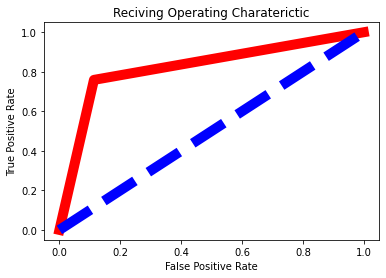

In [190]:
fpr,tpr,threshold=roc_curve(predgbc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="red",lw=10,label="ROC_CURVE (area-%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="blue",lw=10,linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciving Operating Charaterictic")
plt.show()

In [191]:
# Conclusion
import numpy as np
a=np.array(y_test)

In [192]:
predicted=np.array(gbc.predict(x_test))


In [193]:
df_compare=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))

In [194]:
df_compare

,original,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
6941,0,0
6942,0,0
6943,0,0
6944,0,0
